In [1]:
from standardInclude import *

Welcome to JupyROOT 6.12/06
For interactive plots, run: setint()
To return to non-interactive plots (default state), run: noint()


In [10]:
files = []
for calo in range(1,25):
    #filei = "/home/jlab/g-2/detectorOps/gains/gainSettingsRun2/gainSettings/tunedGainsOutCalo"+str(calo)+".json"
    filei = "/home/jlab/g-2/detectorOps/gains/outputGainSettings/iteration5/gainSettings_Iteration5_calo"+str(calo)+".json"
    files.append(filei)

In [11]:
print(files)

['/home/jlab/g-2/detectorOps/gains/outputGainSettings/iteration5/gainSettings_Iteration5_calo1.json', '/home/jlab/g-2/detectorOps/gains/outputGainSettings/iteration5/gainSettings_Iteration5_calo2.json', '/home/jlab/g-2/detectorOps/gains/outputGainSettings/iteration5/gainSettings_Iteration5_calo3.json', '/home/jlab/g-2/detectorOps/gains/outputGainSettings/iteration5/gainSettings_Iteration5_calo4.json', '/home/jlab/g-2/detectorOps/gains/outputGainSettings/iteration5/gainSettings_Iteration5_calo5.json', '/home/jlab/g-2/detectorOps/gains/outputGainSettings/iteration5/gainSettings_Iteration5_calo6.json', '/home/jlab/g-2/detectorOps/gains/outputGainSettings/iteration5/gainSettings_Iteration5_calo7.json', '/home/jlab/g-2/detectorOps/gains/outputGainSettings/iteration5/gainSettings_Iteration5_calo8.json', '/home/jlab/g-2/detectorOps/gains/outputGainSettings/iteration5/gainSettings_Iteration5_calo9.json', '/home/jlab/g-2/detectorOps/gains/outputGainSettings/iteration5/gainSettings_Iteration5_ca

In [12]:
initialList = []
for filei in files:
    f = open(filei, "r")
    calo = int(filei.split("_calo")[1].split('.')[0])
    for x in f:
        if("sipm" in x):
            #print(x)
            #print(x.split(" "))
            gain = int(x.split(" ")[1][:2])
            sipm = int(x.split("sipm")[1].split('"')[0])
            if(gain <= 80):
                initialList.append([calo, sipm, gain])

/home/jlab/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: ResourceWarning: unclosed file <_io.TextIOWrapper name='/home/jlab/g-2/detectorOps/gains/outputGainSettings/iteration6/gainSettings_Iteration6_calo24.json' mode='r' encoding='UTF-8'>
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jlab/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: ResourceWarning: unclosed file <_io.TextIOWrapper name='/home/jlab/g-2/detectorOps/gains/outputGainSettings/iteration5/gainSettings_Iteration5_calo1.json' mode='r' encoding='UTF-8'>
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jlab/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: ResourceWarning: unclosed file <_io.TextIOWrapper name='/home/jlab/g-2/detectorOps/gains/outputGainSettings/iteration5/gainSettings_Iteration5_calo2.json' mode='r' encoding='UTF-8'>
  This is separate from the ipykernel package so we can avoid doing

In [13]:
df = pandas.DataFrame( initialList, index=None, columns=["Calo", "SiPM", "Gain"] )

In [14]:
df.head()

,Calo,SiPM,Gain
0,1,0,58
1,1,1,72
2,1,2,57
3,1,3,65
4,1,4,63


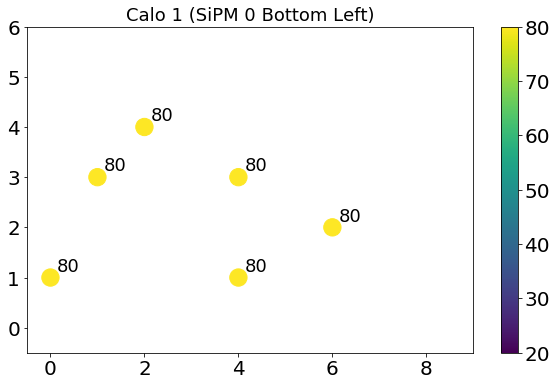

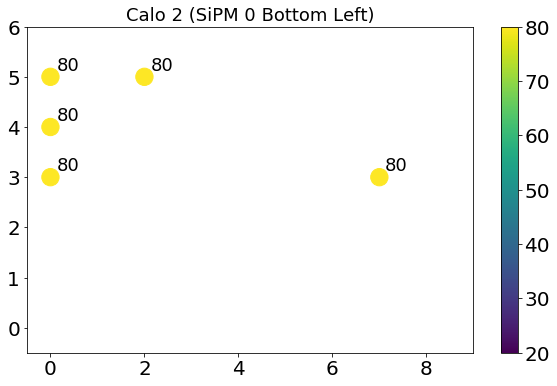

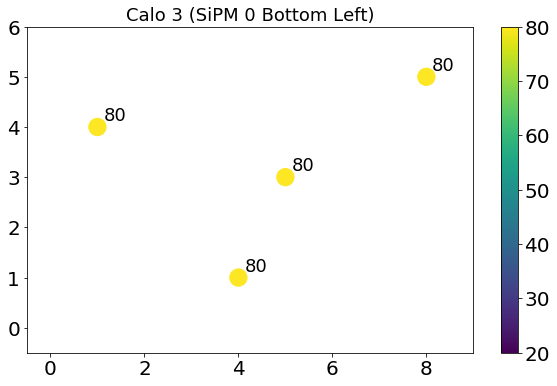

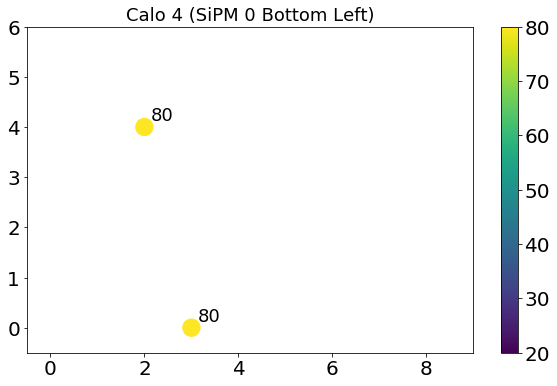

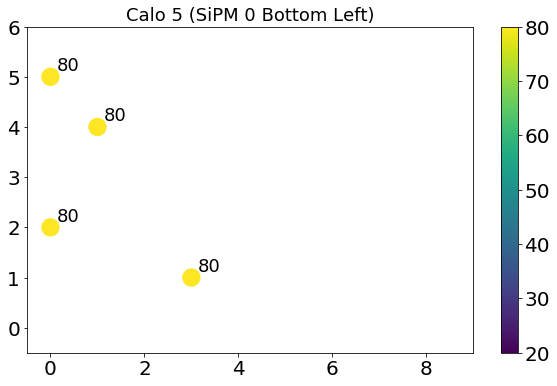

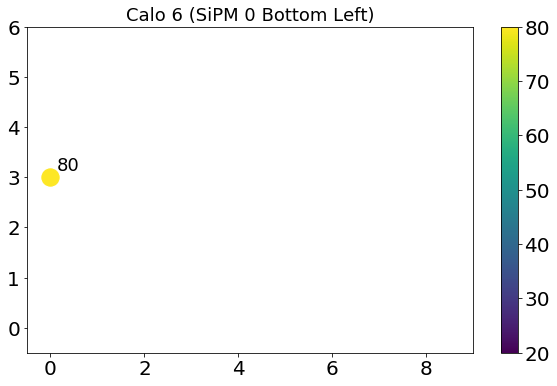

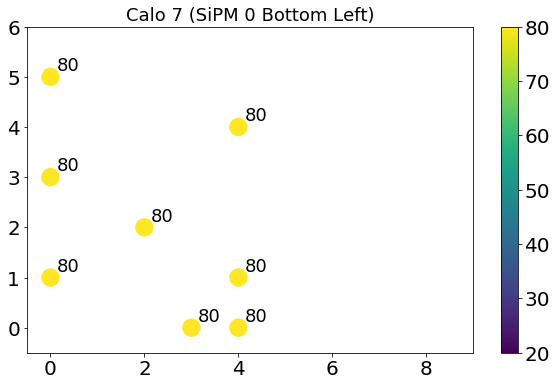

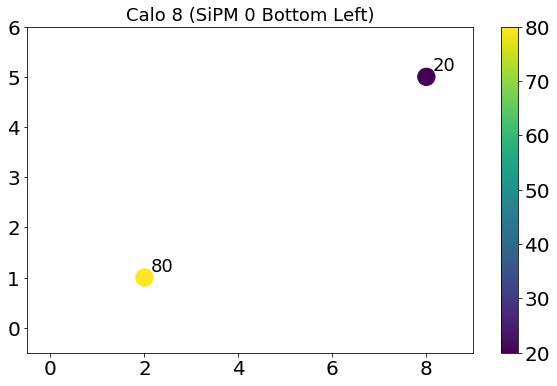

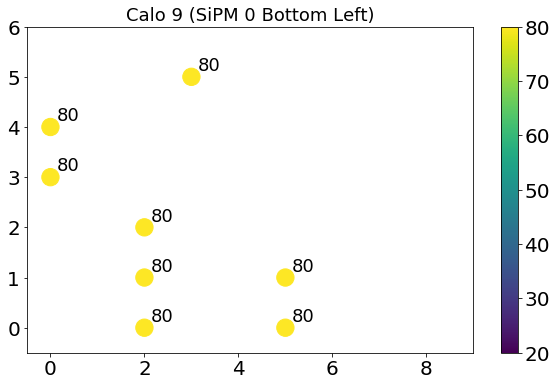

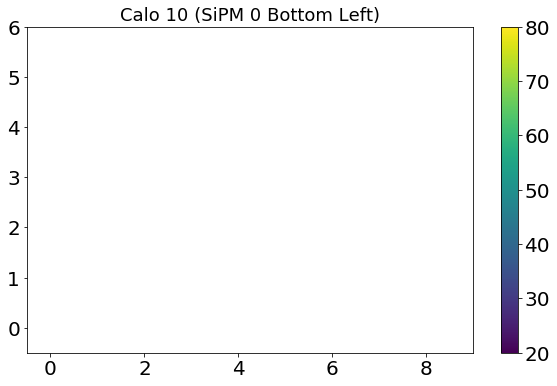

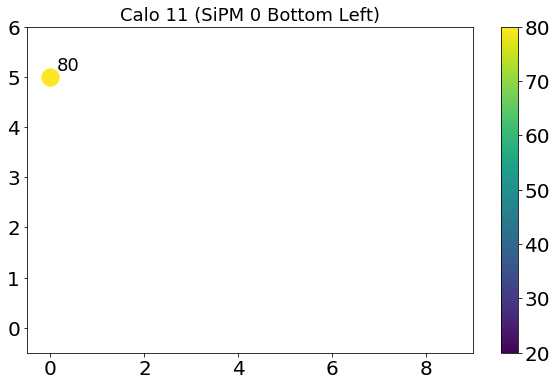

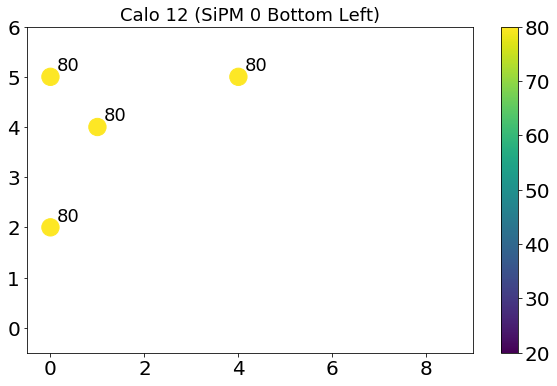

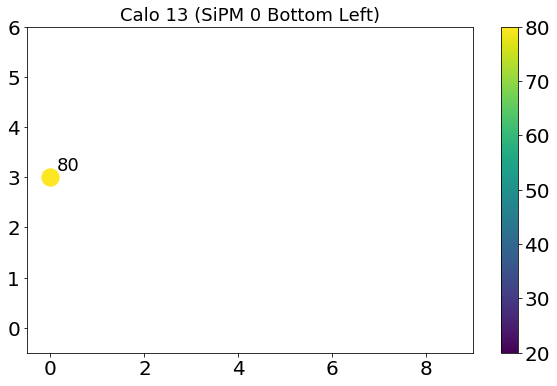

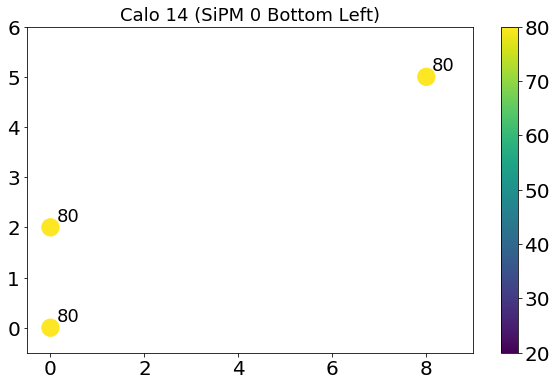

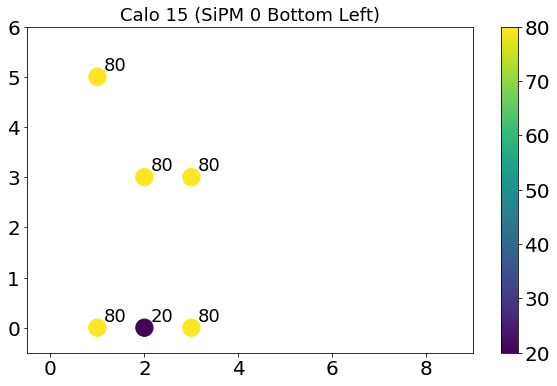

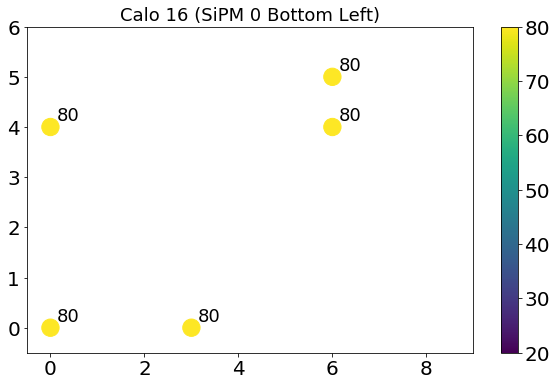

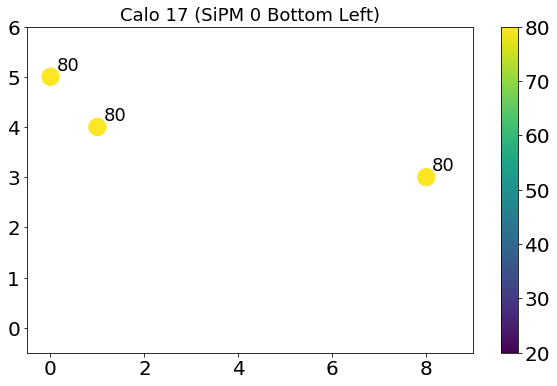

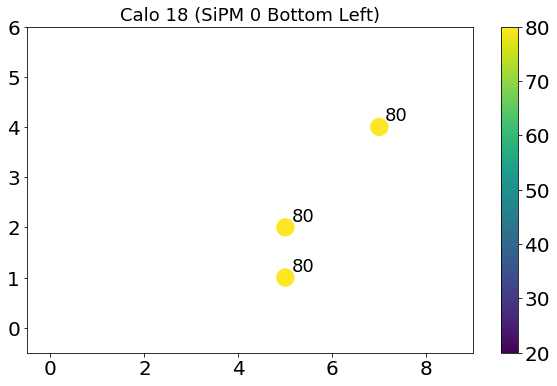

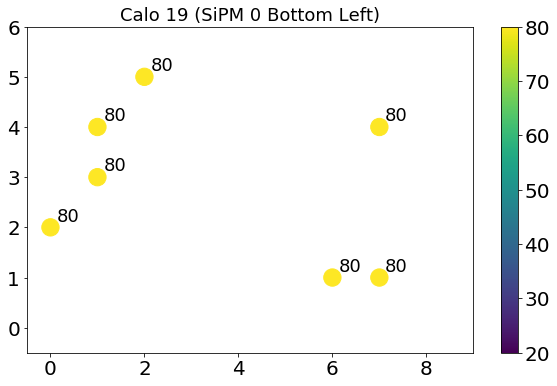

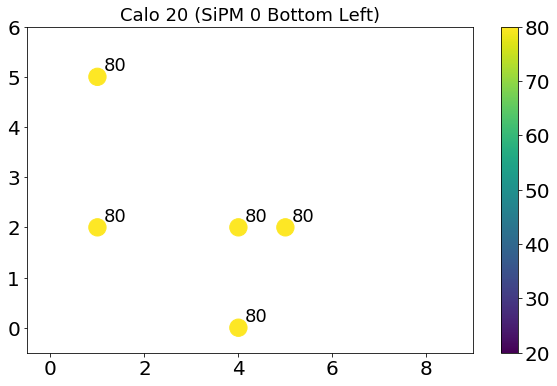

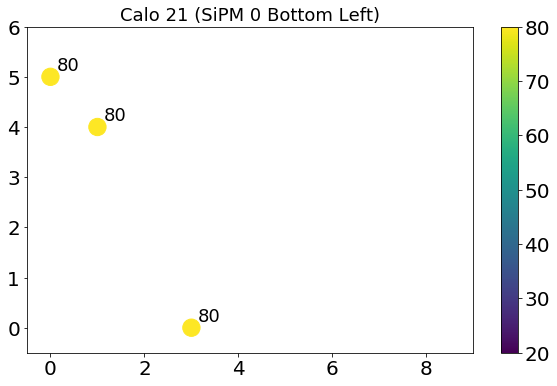

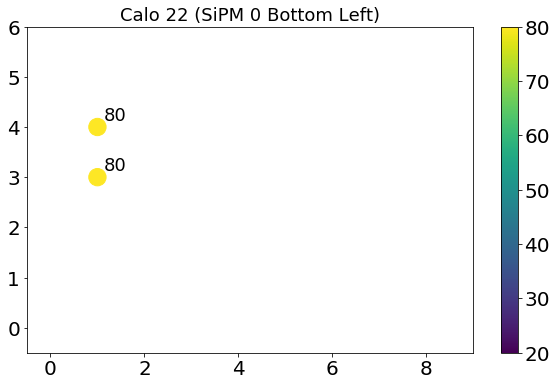

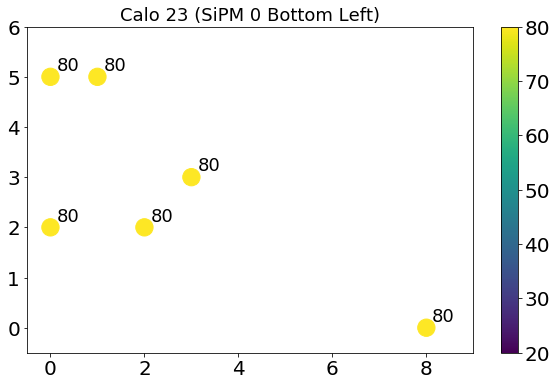

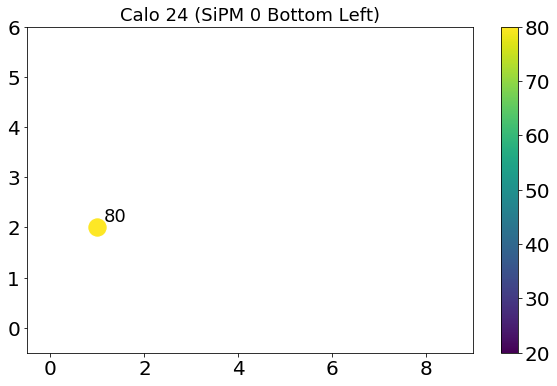

In [17]:
for calo in range(1,25):
    dfi = df.loc[df['Calo'] == calo].loc[(df['Gain'] == 80) | (df['Gain'] == 20)]
    #plt.plot(df['SiPM'], df['Gain'],".")
    #plt.show()
    fig,ax = plt.subplots(figsize=(10,6))
    x = ((dfi['SiPM']) % 9).tolist()
    y = (np.floor( dfi['SiPM'] / 9 )).tolist()
    gains = (dfi['Gain']).tolist()
    label = list([str(i) for i in gains])
    #plt.scatter( (df['SiPM']) % 9, np.floor( df['SiPM'] / 9 ), c=df['Gain'])
    plt.scatter( x,y, c=gains, s=300, vmin=20, vmax=80)
    #plt.text( x=(df['SiPM']) % 9, y=np.floor( df['SiPM'] / 9 ), s = ['hi' for i in range(54)] , fontsize=9)
    for (xi, yi, li) in zip(x,y,label):
        plt.text(xi+0.125, yi+0.125, s=li, fontsize=18)
    plt.colorbar()
    plt.title("Calo "+str(calo)+" (SiPM 0 Bottom Left)", fontsize=18)
    plt.ylim(-0.5,6)
    plt.xlim(-0.5,9)
    plt.show()

In [22]:
dfLow = df.loc[df['Gain'] < 30]
dfLow.head()

,Calo,SiPM,Gain


In [23]:
dfLow = df.loc[df['Gain'] == 80]
dfLow.describe()

,Calo,SiPM,Gain
count,259.000000,259.000000,259.0
mean,12.501931,23.872587,80.0
std,6.927853,15.623327,0.0
min,1.000000,0.000000,80.0
25%,6.000000,10.000000,80.0
50%,14.000000,22.000000,80.0
75%,18.000000,37.000000,80.0
max,24.000000,53.000000,80.0
